In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews_data_dictionary.csv
/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings_data_dictionary.csv


<div style="background-color: #FF5A5F; padding: 25px; border-radius: 10px;">
  <h1 style="color: white; font-size: 28px; font-weight: bold; margin: 0; text-align:center">
    Impact of Airbnb Regulations on Hosts and Prices
  </h1>
  <h3 style="color: #F7F7F7; font-weight: normal; margin-top: 10px;text-align:center">
    A data-driven story of change in the Paris rental market
  </h3>
</div>


<img src="https://cdn.intuji.com/2023/04/kelcie-papp-Gk0MAP8A7Cw-unsplash.png" width=1000>

<h2 style="color: #FF5A5F; border-bottom: 2px solid #FC642D; padding-bottom: 5px;">
  📊 Exploratory Data Analysis (EDA)
</h2>
<p style="color: #484848; font-size: 16px;">
  We'll analyze how key metrics—such as the number of new hosts and average prices—have evolved over time, especially before and after regulatory changes.
</p>


In [2]:
reviews_dict = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews_data_dictionary.csv")


In [3]:
reviews_dict

,Field,Description
0,listing_id,Listing ID
1,review_id,Review ID
2,date,Review date
3,reviewer_id,Reviewer ID


In [4]:
reviews = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Reviews.csv")

In [5]:
reviews.head()

,listing_id,review_id,date,reviewer_id
0,11798,330265172,2018-09-30,11863072
1,15383,330103585,2018-09-30,39147453
2,16455,329985788,2018-09-30,1125378
3,17919,330016899,2018-09-30,172717984
4,26827,329995638,2018-09-30,17542859


In [6]:
listing_dict = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings_data_dictionary.csv")

In [7]:
import warnings
warnings.filterwarnings("ignore") # it will ignore all the warning and wont show it. error will be not affected

In [8]:
listing_dict

,Field,Description
0,listing_id,Listing ID
1,name,Listing Name
2,host_id,Host ID
3,host_since,Date the Host joined Airbnb
4,host_location,Location where the Host is based
5,host_response_time,Estimate of how long the Host takes to respond
6,host_response_rate,Percentage of times the Host responds
7,host_acceptance_rate,Percentage of times the Host accepts a booking...
8,host_is_superhost,Binary field to determine if the Host is a Sup...
9,host_total_listings_count,Total listings the Host has in Airbnb


<div style="background-color: #FF5A5F; padding: 25px; border-radius: 10px;">
  <h1 style="color: white; font-size: 24px; font-weight: bold; margin: 0;text-align:center">
    📂 Loading and Checking the Dataset
  </h1>
</div>


In [9]:
listing = pd.read_csv(r"/kaggle/input/airbnb-listings-reviews/Airbnb Data/Listings.csv",
                     encoding = 'ISO-8859-1',low_memory=False)

In [10]:
listing.head()

,listing_id,name,host_id,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_total_listings_count,...,minimum_nights,maximum_nights,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
0,281420,"Beautiful Flat in le Village Montmartre, Paris",1466919,2011-12-03,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
1,3705183,39 mÃÂ² Paris (Sacre CÃ âur),10328771,2013-11-29,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
2,4082273,"Lovely apartment with Terrace, 60m2",19252768,2014-07-31,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
3,4797344,Cosy studio (close to Eiffel tower),10668311,2013-12-17,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f
4,4823489,Close to Eiffel Tower - Beautiful flat : 2 rooms,24837558,2014-12-14,"Paris, Ile-de-France, France",NaN,NaN,NaN,f,1.0,...,2,1125,100.0,10.0,10.0,10.0,10.0,10.0,10.0,f


In [11]:
listing['host_since']=pd.to_datetime(listing['host_since'])

<div style="background-color: #FF5A5F; padding: 25px; border-radius: 10px;">
  <h1 style="color: white; font-size: 24px; font-weight: bold; margin: 0;text-align:center">
    🧾 Information About the Dataset
  </h1>
</div>


In [12]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279712 entries, 0 to 279711
Data columns (total 33 columns):
 #   Column                       Non-Null Count   Dtype         
---  ------                       --------------   -----         
 0   listing_id                   279712 non-null  int64         
 1   name                         279537 non-null  object        
 2   host_id                      279712 non-null  int64         
 3   host_since                   279547 non-null  datetime64[ns]
 4   host_location                278872 non-null  object        
 5   host_response_time           150930 non-null  object        
 6   host_response_rate           150930 non-null  float64       
 7   host_acceptance_rate         166625 non-null  float64       
 8   host_is_superhost            279547 non-null  object        
 9   host_total_listings_count    279547 non-null  float64       
 10  host_has_profile_pic         279547 non-null  object        
 11  host_identity_verified    

In [13]:
listing['city']

0         Paris
1         Paris
2         Paris
3         Paris
4         Paris
          ...  
279707    Paris
279708    Paris
279709    Paris
279710    Paris
279711    Paris
Name: city, Length: 279712, dtype: object

In [14]:
listing['city'].value_counts()

city
Paris             64690
New York          37012
Sydney            33630
Rome              27647
Rio de Janeiro    26615
Istanbul          24519
Mexico City       20065
Bangkok           19361
Cape Town         19086
Hong Kong          7087
Name: count, dtype: int64

<div style="background-color: #FF5A5F; padding: 25px; border-radius: 10px;">
  <h1 style="color: white; font-size: 24px; font-weight: bold; margin: 0;text-align:center">
    🔄 Columns and Rows Filtering
  </h1>
</div>


In [15]:
# getting only data of city paris and perticular coloums only 
paris_listing=listing.query("city=='Paris'").loc[:,['host_since','neighbourhood','city','accommodates','price']]

<div style="background-color: #FF5A5F; padding: 25px; border-radius: 10px;">
  <h1 style="color: white; font-size: 24px; font-weight: bold; margin: 0;text-align:center">
    🗼 Paris City Data Analysis
  </h1>
</div>


In [16]:
paris_listing.info()


<class 'pandas.core.frame.DataFrame'>
Index: 64690 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64657 non-null  datetime64[ns]
 1   neighbourhood  64690 non-null  object        
 2   city           64690 non-null  object        
 3   accommodates   64690 non-null  int64         
 4   price          64690 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


In [17]:
paris_listing.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


<div style="background-color: #FF5A5F; padding: 25px; border-radius: 10px;">
  <h1 style="color: white; font-size: 24px; font-weight: bold; margin: 0;text-align:center">
    🔍 Checking if There Are Missing Values in the Dataset
  </h1>
</div>


In [18]:
# isna() act as bool , return true is the value is NULL else false
paris_listing.isna().sum()


host_since       33
neighbourhood     0
city              0
accommodates      0
price             0
dtype: int64

In [19]:
# there are few null values in host_since()
paris_listing.dropna(how='any',inplace=True)

In [20]:
paris_listing.isna().sum()

host_since       0
neighbourhood    0
city             0
accommodates     0
price            0
dtype: int64

In [21]:
paris_listing.describe()

,host_since,accommodates,price
count,64657,64657.000000,64657.000000
mean,2015-11-01 11:06:05.528867584,3.037877,113.104614
min,2008-08-30 00:00:00,0.000000,0.000000
25%,2014-03-09 00:00:00,2.000000,59.000000
50%,2015-07-07 00:00:00,2.000000,80.000000
75%,2017-05-29 00:00:00,4.000000,120.000000
max,2021-02-07 00:00:00,16.000000,12000.000000
std,NaN,1.588382,214.479626


In [22]:
paris_listing.head()

,host_since,neighbourhood,city,accommodates,price
0,2011-12-03,Buttes-Montmartre,Paris,2,53
1,2013-11-29,Buttes-Montmartre,Paris,2,120
2,2014-07-31,Elysee,Paris,2,89
3,2013-12-17,Vaugirard,Paris,2,58
4,2014-12-14,Passy,Paris,2,60


In [23]:
paris_listing.describe(include='object')

,neighbourhood,city
count,64657,64657
unique,20,1
top,Buttes-Montmartre,Paris
freq,7232,64657


In [24]:
(paris_listing['accommodates'] == 0).sum() # there are 54 listing which has 0 accomodates in listings
paris_listing[(paris_listing['accommodates'] == 0)].head()

,host_since,neighbourhood,city,accommodates,price
98209,2020-07-20,Pantheon,Paris,0,0
203257,2020-02-04,Batignolles-Monceau,Paris,0,0
203258,2016-10-17,Opera,Paris,0,0
203259,2020-04-24,Luxembourg,Paris,0,0
203260,2020-04-24,Vaugirard,Paris,0,0


In [25]:
paris_listing[paris_listing['accommodates'] == 0].count(axis=0)

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [26]:
(paris_listing['price'] == 0).sum() # 62 listint have price listing as Zero


62

In [27]:
((paris_listing['price'] == 0) & (paris_listing['accommodates'] == 0)).sum() # condtion where both the price and accommodation is zero

54

In [28]:
paris_listing[(paris_listing['price'] == 0) & (paris_listing['accommodates'] == 0)].count(axis=0)

host_since       54
neighbourhood    54
city             54
accommodates     54
price            54
dtype: int64

In [29]:
#  8 values has accomondates listing but price is zero
paris_listing[(paris_listing['price'] == 0) & ~(paris_listing['accommodates'] == 0)].count(axis=0)

host_since       8
neighbourhood    8
city             8
accommodates     8
price            8
dtype: int64

In [30]:
paris_listing=paris_listing[~(paris_listing['price'] == 0)] # reassigning the dataframe where price is not zero, 

In [31]:
paris_listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64595 entries, 0 to 279711
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   host_since     64595 non-null  datetime64[ns]
 1   neighbourhood  64595 non-null  object        
 2   city           64595 non-null  object        
 3   accommodates   64595 non-null  int64         
 4   price          64595 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(2)
memory usage: 3.0+ MB


<div style="background-color: #FF5A5F; padding: 25px; border-radius: 10px;">
  <h1 style="color: white; font-size: 24px; font-weight: bold; margin: 0;text-align:center">
    💰 Finding Average Price of AirBnB in Paris by Localities
  </h1>
</div>


In [32]:
# average price across various neighbourhood in paris
paris_listing_neighbourhood=paris_listing.groupby('neighbourhood').agg({"price":"mean"}).round(2).sort_values(by='price',ascending=False)
paris_listing_neighbourhood

,price
neighbourhood,
Elysee,211.37
Louvre,175.75
Passy,161.29
Palais-Bourbon,157.51
Luxembourg,155.79
Bourse,149.63
Hotel-de-Ville,144.52
Temple,138.43
Pantheon,122.98


In [33]:
paris_listing_accommodates=paris_listing.groupby('accommodates').agg({"price":"mean"}).round(2).sort_values(by='price',ascending=False)
paris_listing_accommodates
# location ,outliers,property type

,price
accommodates,
15,928.42
12,821.43
13,704.58
14,699.23
11,680.91
16,677.06
10,585.76
9,381.90
8,325.02


In [34]:
# inside of paris , th price of AirBbB is directly impacted bu the populatiry of the tourist place or the view
# of Eiffel tower. We need to futher see if the prices are increasing when the regulations are imposed

In [35]:

ellyse_listing_accommodates=paris_listing.query("neighbourhood=='Elysee'").groupby('accommodates').agg({"price":"mean"}).round(2).sort_values(by='price',ascending=False)
ellyse_listing_accommodates # sampaling method 

,price
accommodates,
14,971.00
13,842.50
11,805.00
16,800.00
12,529.62
10,500.86
9,440.27
7,411.54
8,405.52


In [36]:
# the AirBnb with 14 accommodates is the expensive ,even more expensive the 16 accommodates
# the same trend is spotted for 11 and 12 accommodates. Every other accommodation looks reasonable.

<div style="background-color: #FF5A5F; padding: 25px; border-radius: 10px;">
  <h1 style="color: white; font-size: 24px; font-weight: bold; margin: 0;text-align:center">
    🚩 Possible Reasons for this Trend
  </h1>
</div>

<ul style="font-size: 18px; color: #333; line-height: 1.6;">
  <li>🏡 Owners of properties with 16 people might face occupancy issues due to fewer large groups.</li>
  <li>👨‍👩‍👧‍👦 The ones with 14 people might be a sweet spot for a group having two families traveling.</li>
  <li>📍 There is a possibility that more than 16 and 12 occupancy properties are away from hotspots in Elysee.</li>
  <li>📊 There might be potential outliers in 11 and 14 occupancy properties which are skewing the trend.</li>
</ul>


In [37]:
paris_listing['host_since'].nunique()

3854

<div style="background-color: #FF5A5F; padding: 25px; border-radius: 10px;">
  <h1 style="color: white; font-size: 24px; font-weight: bold; margin: 0;text-align:center">
    📈 Finding Popularity of AirBnB Over Time
  </h1>
</div>


In [38]:
paris_listings_over_time=paris_listing.set_index("host_since").resample("Y").agg({'neighbourhood':'count','price':'mean'})

In [39]:
paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8867,114.211345


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

<div style="background-color: #FF5A5F; padding: 20px; border-radius: 10px;">
  <h2 style="color: white; font-size: 22px; font-weight: bold; margin: 0;text-align:center">
    📊 Data Visualization
  </h2>
</div>


In [41]:
paris_listing_neighbourhood

,price
neighbourhood,
Elysee,211.37
Louvre,175.75
Passy,161.29
Palais-Bourbon,157.51
Luxembourg,155.79
Bourse,149.63
Hotel-de-Ville,144.52
Temple,138.43
Pantheon,122.98


Text(0, 0.5, "Prominet places with AirBnB's")

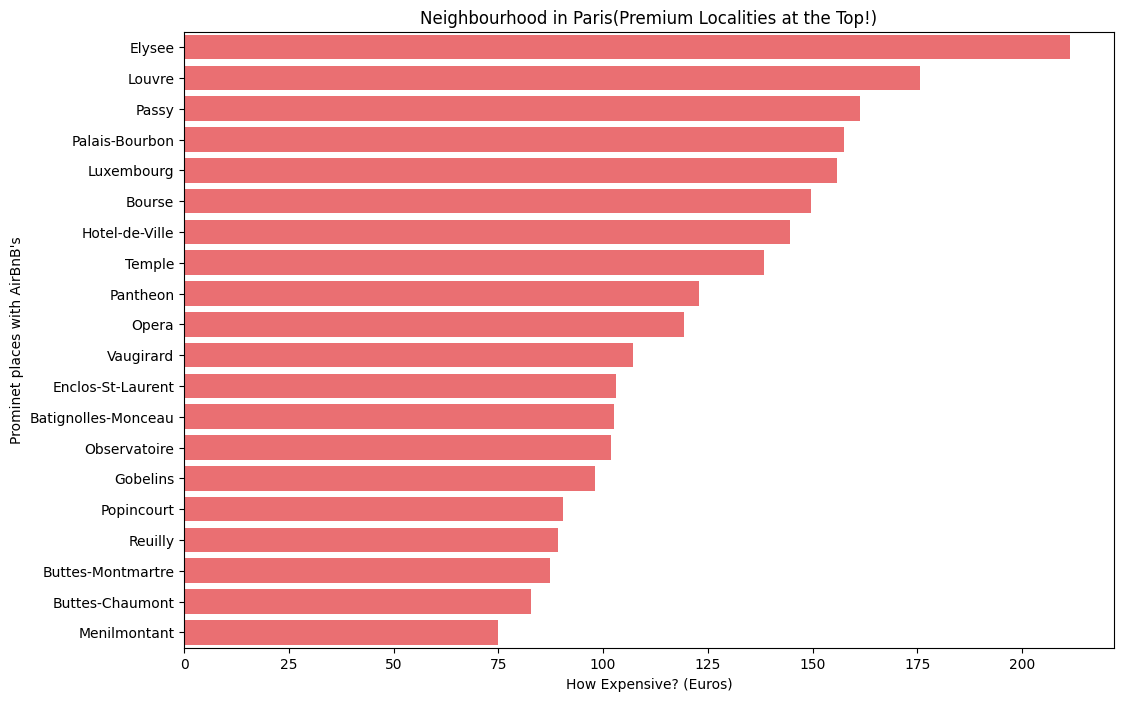

In [42]:
plt.figure(figsize = (12,8)) # create a canvas to restrice the size of plt
sns.barplot(data=paris_listing_neighbourhood,
           x='price',
           y=paris_listing_neighbourhood.index,
           color='#FF5A5F',
           )
plt.title("Neighbourhood in Paris(Premium Localities at the Top!)")
plt.xlabel("How Expensive? (Euros)")
plt.ylabel("Prominet places with AirBnB's")


In [43]:
# Inside of Paris, the price of AirBnBs is directly impacted by the popularity of the tourist place or 
# the view of Eiffel tower. We need to further see if the prices are increasing when the regulations are imposed.

In [44]:
ellyse_listing_accommodates

,price
accommodates,
14,971.00
13,842.50
11,805.00
16,800.00
12,529.62
10,500.86
9,440.27
7,411.54
8,405.52


Text(0, 0.5, 'Number of people that can stay')

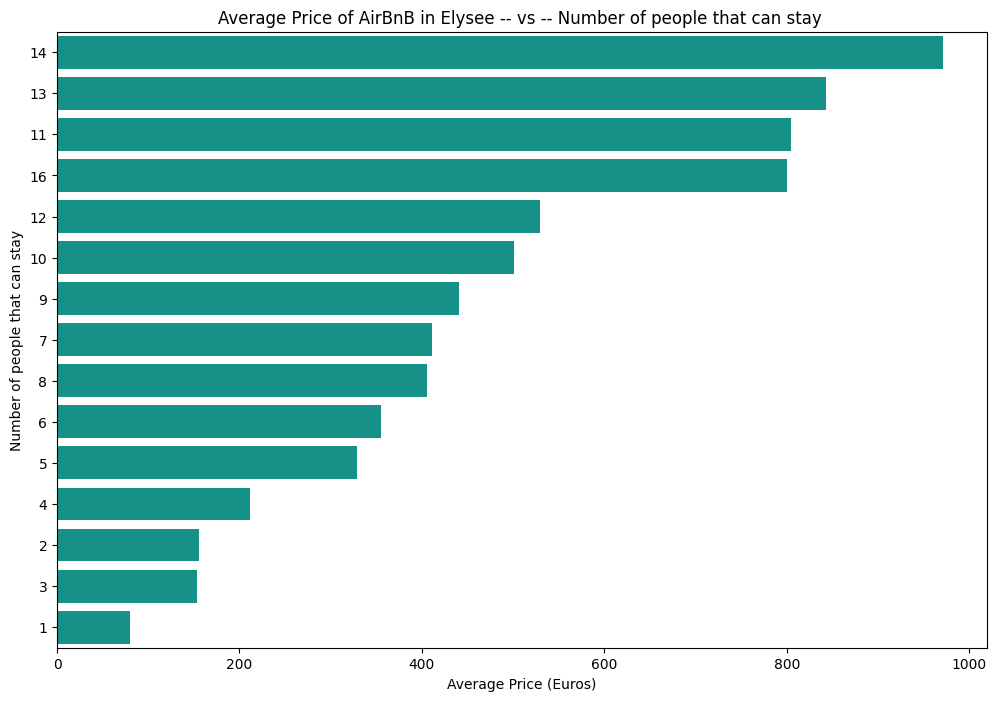

In [45]:
plt.figure(figsize = (12,8)) # create a canvas to restrice the size of plt
sns.barplot(data=ellyse_listing_accommodates,
           x='price',
           y=ellyse_listing_accommodates.index,
           color='#00A699',
           orient= 'h',
           order=ellyse_listing_accommodates.index)
plt.title("Average Price of AirBnB in Elysee -- vs -- Number of people that can stay ")
plt.xlabel("Average Price (Euros)")
plt.ylabel("Number of people that can stay")


In [46]:
# The AirBnBs with 14 people accomodation is the costliest, even costlier than 16 accomodates. 
# the same trend is spotted for 11 and 12 accomodates. Every other accomodation looks reasonable.

In [47]:
paris_listings_over_time

,neighbourhood,price
host_since,,
2008-12-31,4,77.750000
2009-12-31,106,159.641509
2010-12-31,416,125.031250
2011-12-31,1339,124.828230
2012-12-31,4592,111.578615
2013-12-31,8142,107.096414
2014-12-31,10922,100.253800
2015-12-31,12147,103.646250
2016-12-31,8867,114.211345


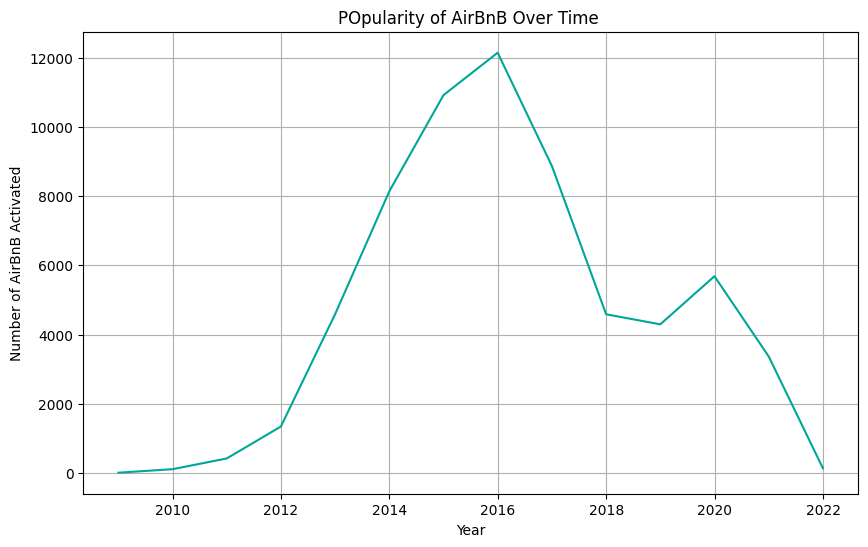

In [48]:
plt.figure(figsize=(10,6))
sns.lineplot(data=paris_listings_over_time['neighbourhood'],
            color='#00A699'
            )
plt.title("POpularity of AirBnB Over Time ")
plt.xlabel("Year")
plt.ylabel("Number of AirBnB Activated")
plt.grid(True)
plt.show()


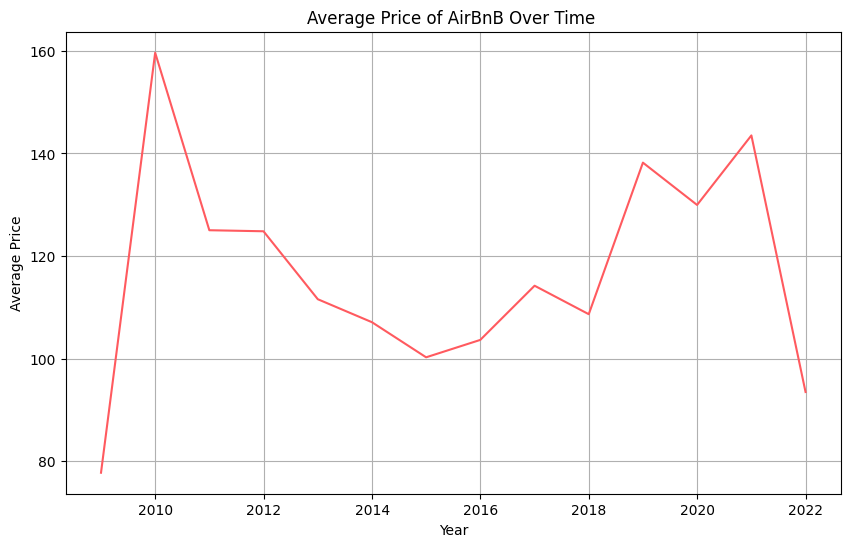

In [49]:
plt.figure(figsize=(10,6))
sns.lineplot(data=paris_listings_over_time['price'],
            color='#FF5A5F'
            )
plt.title("Average Price of AirBnB Over Time ")
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.grid(True)
plt.show()


<div style="background-color: #FF5A5F; padding: 25px; border-radius: 10px;">
  <h1 style="color: white; font-size: 24px; font-weight: bold; margin: 0;text-align:center">
    📊 Finding Effects of Regulations on AirBnB Business
  </h1>
</div>


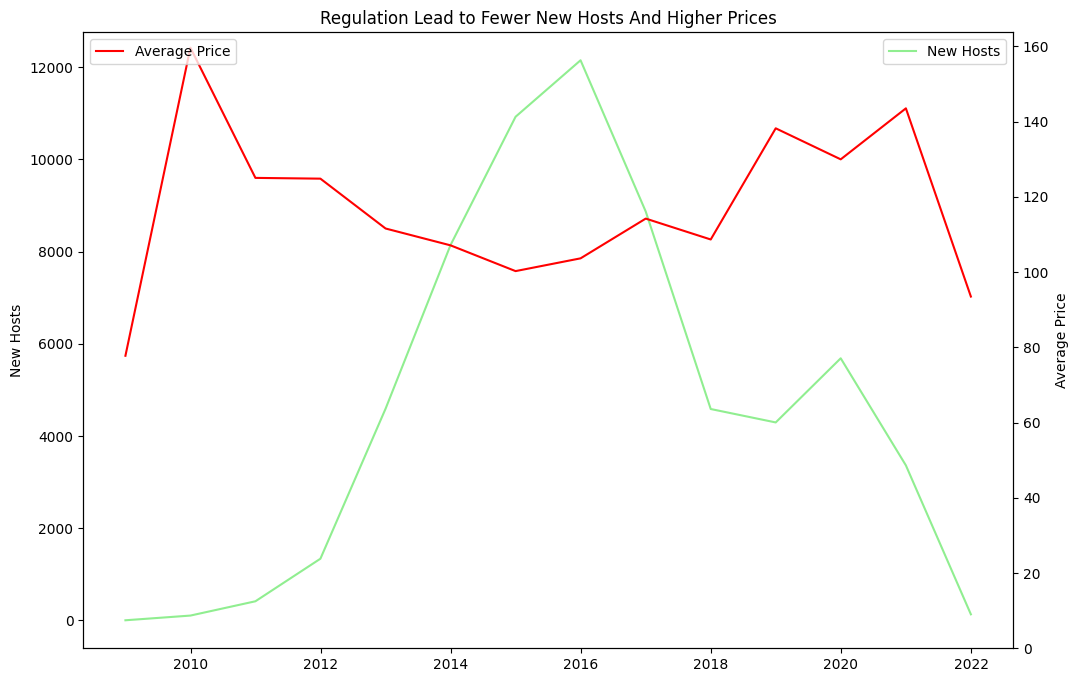

In [50]:
fig,ax = plt.subplots(figsize=(12,8))
ax.plot(paris_listings_over_time.index,paris_listings_over_time['neighbourhood'],label='New Hosts',c='lightgreen')
ax.set_ylabel('New Hosts')
ax2=ax.twinx()
ax2.plot(paris_listings_over_time.index,paris_listings_over_time['price'],label='Average Price',c='red')
ax2.set_ylim(0)
ax2.set_ylabel('Average Price')
ax.legend(loc='upper right')
ax2.legend(loc='upper left')
ax.set_title("Regulation Lead to Fewer New Hosts And Higher Prices")
plt.show()


<div style="background-color: #FF5A5F; padding: 25px; border-radius: 10px;">
  <h1 style="color: white; font-size: 24px; font-weight: bold; margin: 0;text-align:center">
    &#128269; Final Insights
  </h1>
</div>

### 1. Early Growth Period (Pre-Regulation):
- The number of AirBnBs kept increasing since the launch, and prices kept rising as a result of initial traction and early adopters.

### 2. Stabilization Period:
- As AirBnB became a well-known platform and entered the mainstream, the number of AirBnBs continued to increase, but prices started to stabilize and even decrease in some areas.

### 3. Regulation Announcement (2015):
- With the announcement of regulations around 2015, there was a decline in confidence in the AirBnB business. The number of listings started decreasing, while prices began to increase due to limited supply and more stringent rules.

### 4. Post-Regulation Normalization (2019 and Beyond):
- By 2019, with regulation becoming the new normal, the number of AirBnBs started to increase again, but prices began to decrease due to more supply and lower demand pressure.


<div style="background-color: #FF5A5F; padding: 25px; border-radius: 10px;">
  <h1 style="color: white; font-size: 24px; font-weight: bold; margin: 0;text-align:center">
    &#128161; Recommendation for AirBnB
  </h1>
</div>

### 1. Impact of Long-Term Rental Regulations:
- Regulations in long-term rentals can impact the business adversely, leading to customer and host churn due to uncertainty.

### 2. Financial Implications:
- Such regulations might add to AirBnB's losses, which could be difficult to recover in the future.

### 3. Brand Perception Risks:
- If the customer experience is affected due to these regulations, it may lead to an incorrect or negative brand perception.

### 4. Proactive Strategy:
- It is recommended to monitor similar regulations in other regions and be prepared to adapt.

### 5. Replication of Regulations:
- AirBnB can replicate such regulations in other locations to proactively manage potential issues.

### 6. Host Management:
- Strict rules for onboarding and releasing hosts could help maintain a balanced ecosystem.

### 7. Locality Limitations:
- Limiting the number of AirBnBs in a locality will ensure sufficient rental options for the public and avoid unnecessary government intervention.